# **Homework Assignment: Is a *queen* really just a *king*, minus a *man*, plus a *woman*?**

--------------



In class, we dealt with **embeddings** trained for **sentiment classification**. These embeddings are optimized to separate *positive* from *negative* expressions and **do not encode deeper semantic information**.

However, in modern natural language processing, there exist other embeddings — such as those from **BERT**, **word2vec**, or **GloVe** — that **do capture semantic structure**. These models are trained on large corpora, and their embeddings often allow for meaningful **vector arithmetic**, like the famous:

```
embedding("king") - embedding("man") + embedding("woman") ≈ embedding("queen")
```

This homework explores **semantic vector relationships** using such pretrained embeddings.

## **The Objective**

Your task is to:

1. Construct semantic classes of word pairs.
2. Visualize them using PCA.
3. Explore arithmetic operations in embedding space.

## **Tasks & Deliverables**

### 1. **Semantic Pair Classes**

- You must gather **at least 10 classes** of semantically related word pairs.
- Each class must contain **at least 5 pairs**.
- That gives a **minimum total of 100 unique words** (10 classes x 5 pairs x 2 words per pair).

Two example classes:

**Class 1: Gender**

- (king, queen)
- (man, woman)
- (doctor, nurse)
- (prince, princess)
- *(you must add one more)*

**Class 2: Verb tense (past tense)**

- (bring, brought)
- (get, got)
- (like, liked)
- *(you must add two more)*

**Your job:**

- Invent or search for **at least 10 such classes**, including the examples above.
- Each class must be conceptually coherent.
- Other examples: singular/plural, country/capital, comparative/superlative, tool/user, job/object, etc.

### 2. **Global PCA (Across All Words)**

- Use PCA to reduce the **entire set of 100 word embeddings** to 2D, and plot it.
- Plot the additional **10 separate charts**, one for each class.
  - Each chart should display only the 10 words (5 pairs) of the given class.
- Points should be labeled with the words themselves.

### 3. **Local PCA (Per Class)**

- For each class (10 total), perform PCA **only** on the 10 words of that class.
- Plot these class-wise PCA visualizations as separate charts.
- Again, points should be labeled with the words.

**Total: 21 charts**
(1 global plot with 100 words + 10 global-space class plots + 10 local PCA class plots)

Charts should be presented in a self-explanatory manner with clear labels.

### 4. **Embedding Arithmetic**

For each class, choose **one example pair** (e.g., (king, queen)) and perform the operation:

```
embedding(B) - embedding(A) + embedding(C)
```

Where A and B form a known pair, and C is another base word.
For example:

```
embedding("king") - embedding("man") + embedding("woman")
```

* For each such result vector, find the **5 closest word embeddings** (using cosine similarity or Euclidean distance).
* Print the top 5 neighbors **with their distances**.
* Do this **once per class** (i.e., 10 times).

This will make it possible to verify if
 ```
embedding("queen") ≈ embedding("king") - embedding("man") + embedding("woman")
```
for the *gender*-related class.


### 5. **Discussion**

* Analyze and interpret your 21 plots.
* Discuss whether the vector relationships are preserved.
* Does PCA capture semantic differences?
* Are the closest words from the arithmetic meaningful?
* What kinds of relationships are captured, and what are not?
* Are some classes better behaved than others?


### 6. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


## Acknowledgments

*This homework assignment was inspired by an idea from my master's student **Andrzej Małek**, to whom I would like to express my thanks.*



# Solution

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

We are going to use "bert-base-uncased-model". Let's import it.

In [2]:
tok_name = "bert-base-uncased"  
tokenizer = AutoTokenizer.from_pretrained(tok_name)
model     = AutoModel.from_pretrained(tok_name)
emb       = model.get_input_embeddings().weight.data 

In the next section, we’ll define our dictionary. There are different types of similarities: some are related to the structure of the word, while others are more closely tied to geographical factors.

In [3]:
classes = {
    "gender":        [("king","queen"), ("man","woman"), ("prince","princess"),
                      ("actor","actress"), ("husband","wife")],
    "past_tense":    [("bring","brought"), ("get","got"), ("write","wrote"),
                      ("build","built"), ("feel","felt")],
    "singular_plural":[("cat","cats"), ("child","children"), ("mouse","mice"),
                      ("analysis","analyses"), ("bacterium","bacteria")],
    "country_capital":[("France","Paris"), ("Japan","Tokyo"), ("Canada","Ottawa"),
                      ("Brazil","Brasilia"), ("Australia","Canberra")],
    "comparative":   [("cold","colder"), ("fast","faster"), ("happy","happier"),
                      ("bright","brighter"), ("young","younger")],
    "superlative":   [("cold","coldest"), ("fast","fastest"), ("happy","happiest"),
                      ("bright","brightest"), ("young","youngest")],
    "currency_country":[("yen","Japan"), ("euro","Germany"), ("rupee","India"),
                      ("peso","Mexico"), ("franc","Switzerland")],
    "animal_habitat":[("penguin","Antarctica"), ("camel","desert"),
                      ("frog","pond"), ("polar bear","Arctic"),
                      ("kangaroo","outback")],
    "sport_equipment":[("tennis","racket"), ("baseball","bat"), ("hockey","stick"),
                      ("boxing","gloves"), ("golf","club")],
    "profession_workplace":[("chef","kitchen"), ("pilot","cockpit"),
                      ("farmer","farm"), ("librarian","library"),
                      ("mechanic","garage")]
}

We can easily convert our dictionary to list of all words. We are going to create also matrix of embeddings.

In [4]:
def vec(word): # function which returns embedding of a word
    ids = tokenizer(word, add_special_tokens=False)["input_ids"]
    return emb[ids].mean(dim=0).cpu().numpy()  

# list of words and matrix of embeds
word_list = sorted({w for pairs in classes.values() for a,b in pairs for w in (a,b)})
vectors   = np.vstack([vec(w) for w in word_list])

In [5]:
def pca2(mat):  # helper function for calculating PCA
    return PCA(n_components=2).fit_transform(mat)

Let's carry out first PCA. We are going to do this one in respect to all words. We are going to have 11 plots - one for all words and plot for each class.

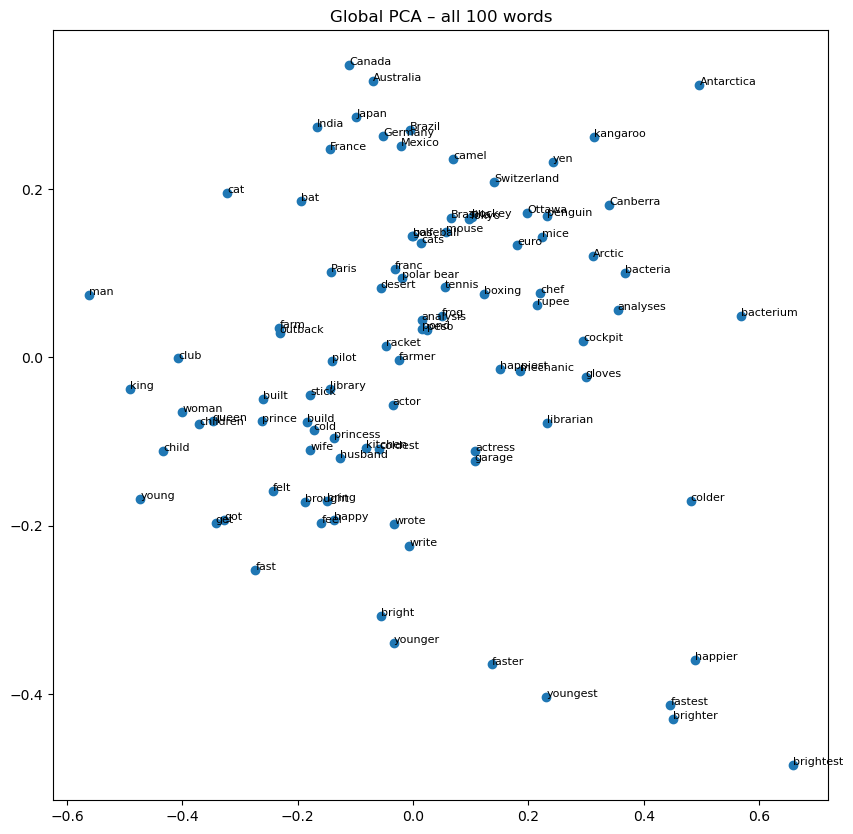

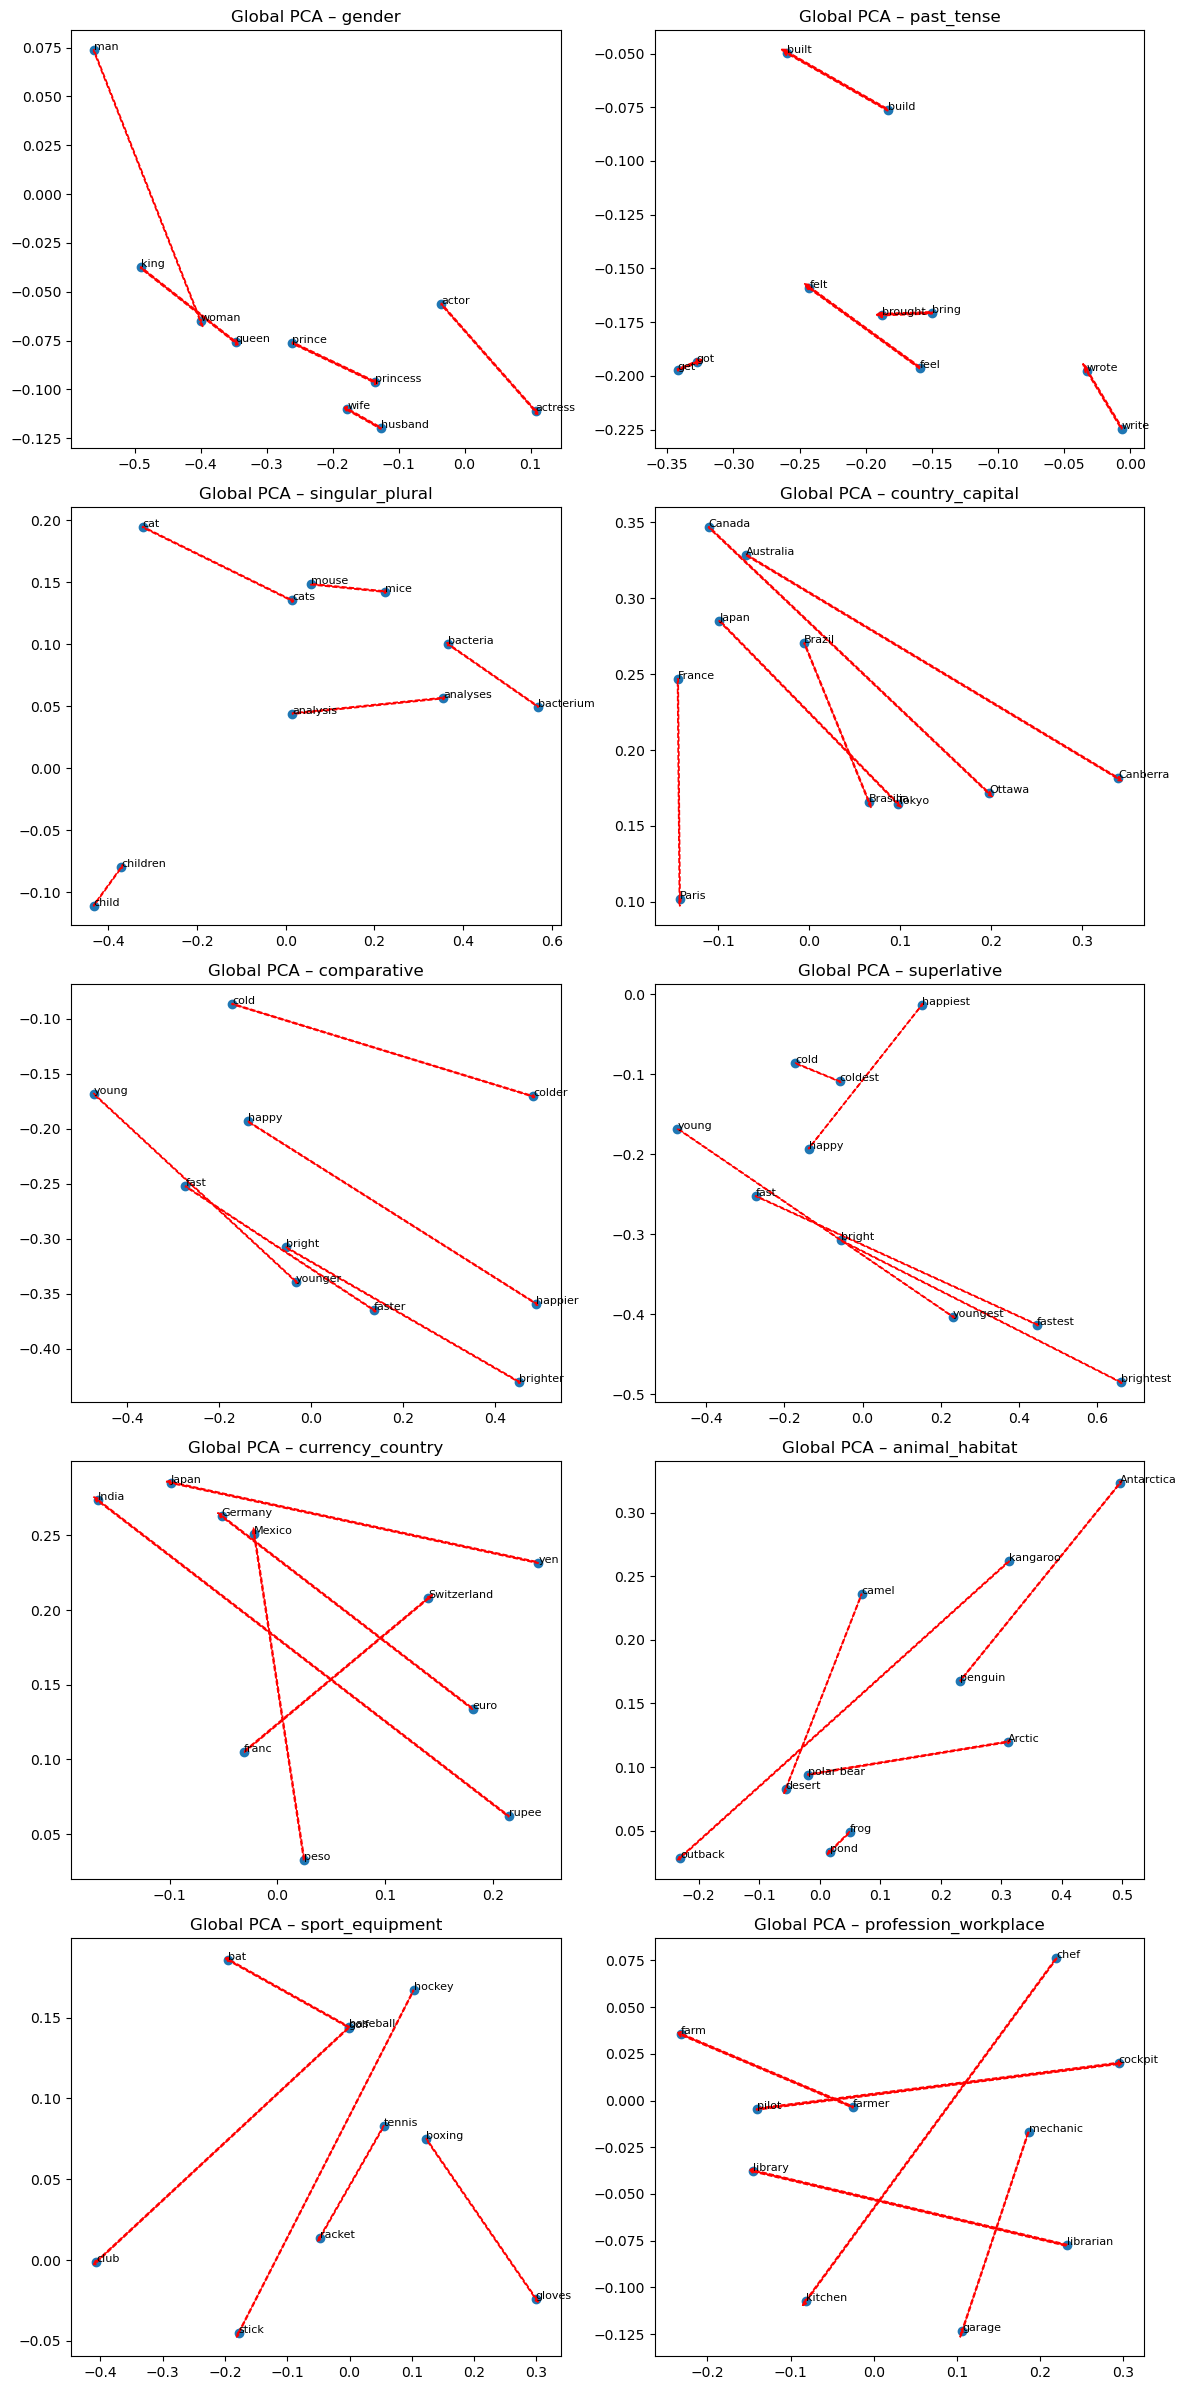

In [6]:
# Global
xy = pca2(vectors)
plt.figure(figsize=(10,10))
plt.scatter(xy[:,0], xy[:,1])
for i,w in enumerate(word_list):
    plt.text(xy[i,0], xy[i,1], w, fontsize=8)
plt.title("Global PCA – all 100 words")
plt.show()


# Local
fig, axes = plt.subplots(5, 2, figsize=(12, 24), tight_layout= True)
axes = axes.flatten()        

for ax, (cname, pairs) in zip(axes, classes.items()):
    
    words = [w for ab in pairs for w in ab]
    idx   = [word_list.index(w) for w in words]
    sub   = xy[idx]

    ax.scatter(sub[:, 0], sub[:, 1])
    
    for j in range(0, len(sub), 2):
        dx = sub[j+1,0] - sub[j,0]
        dy = sub[j+1,1] - sub[j,1]
        ax.arrow(sub[j,0], sub[j,1], dx, dy, linestyle="--" , color = "red")
    
    for i, w in enumerate(words):
        ax.text(sub[i, 0], sub[i, 1], w, fontsize=8)

    ax.set_title(f"Global PCA – {cname}")

plt.show()

Now, we are going to carry out local PCAs.

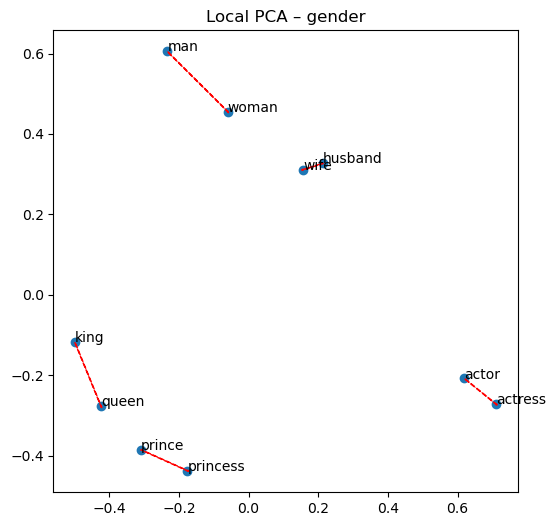

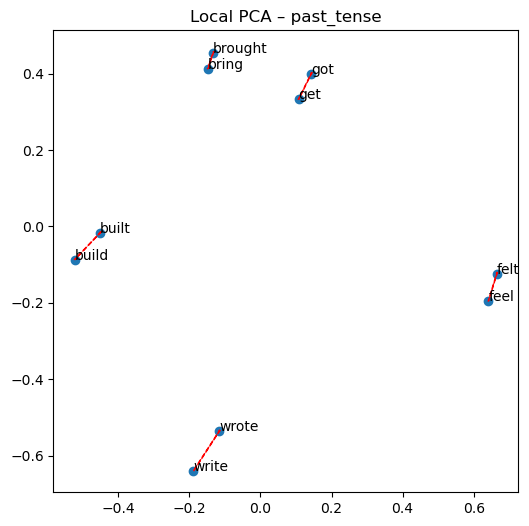

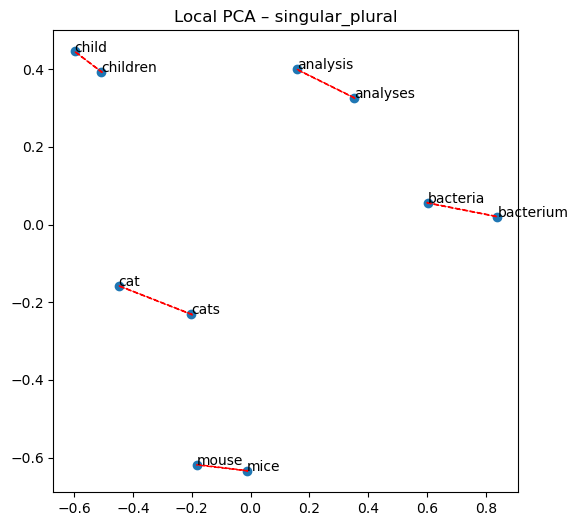

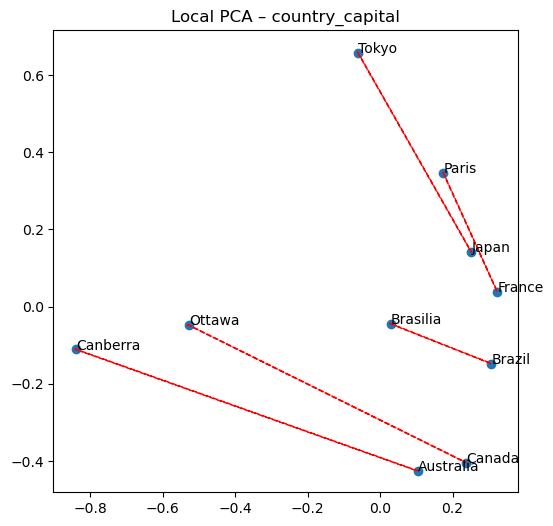

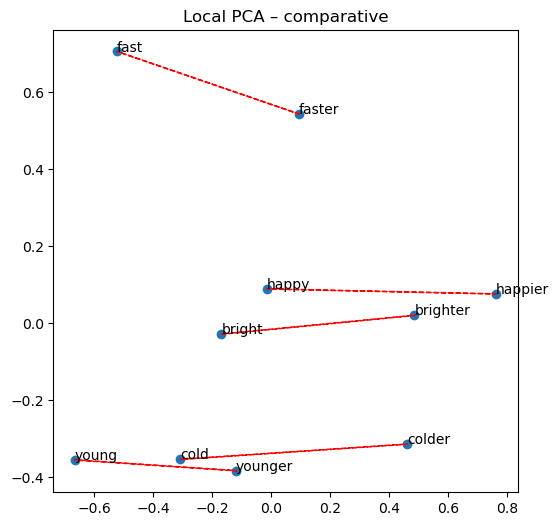

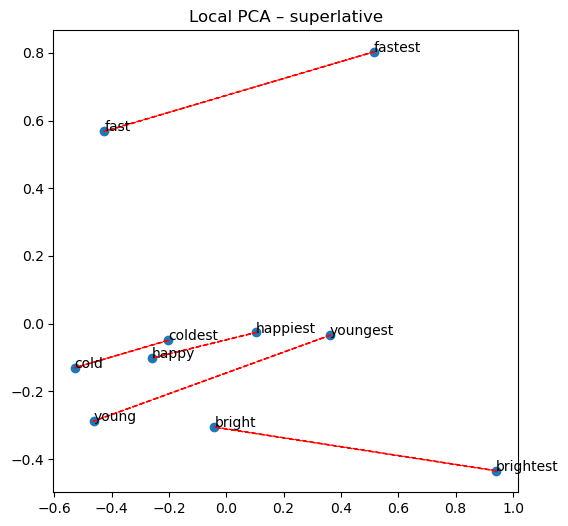

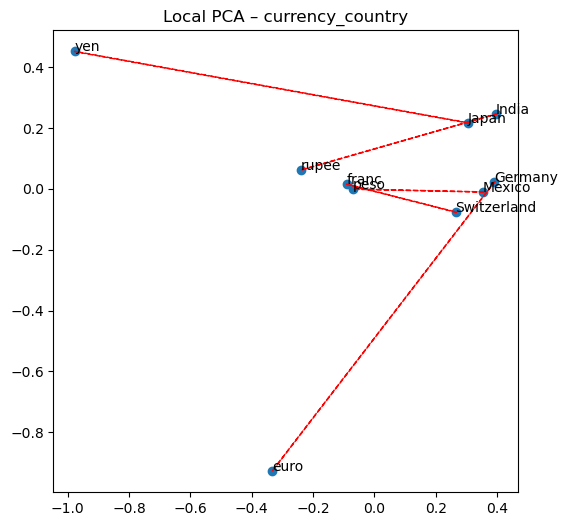

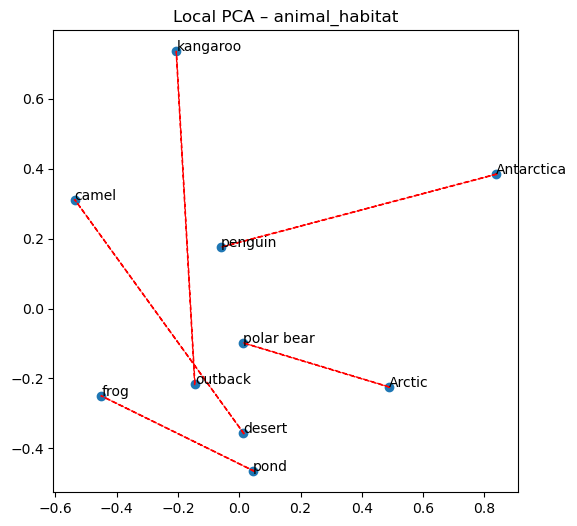

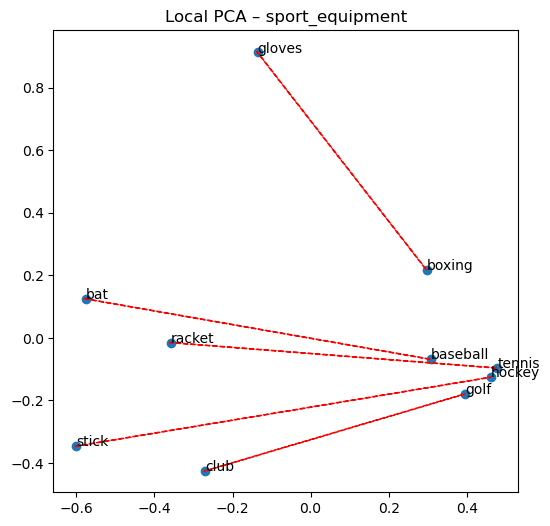

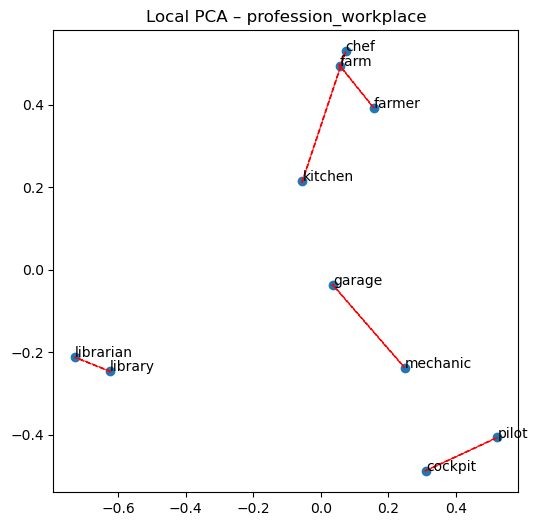

In [7]:
for cname, pairs in classes.items():
    ws = [w for p in pairs for w in p]
    subvec = np.vstack([vec(w) for w in ws])
    xy = pca2(subvec)
    plt.figure(figsize=(6,6))
    plt.scatter(xy[:,0], xy[:,1])
    
    for j in range(0, len(xy), 2):
        dx = xy[j+1,0] - xy[j,0]
        dy = xy[j+1,1] - xy[j,1]
        plt.arrow(xy[j,0], xy[j,1], dx, dy, linestyle="--" , color = "red")
        
    for i,w in enumerate(ws):
        plt.text(xy[i,0], xy[i,1], w)
    plt.title(f"Local PCA – {cname}")
    plt.show()

Finally, we can investigate similarity of our words.

In [8]:
def topn(v, n=5):
    
    similarities, idxs = torch.nn.functional.cosine_similarity(torch.tensor(v), emb, dim=1).topk(n)             
    result = []
    
    for similarity, idx in zip(similarities, idxs):
        word = tokenizer.convert_ids_to_tokens(int(idx))
        result.append((word, float(similarity)))

    return result

for cname, pairs in classes.items():
    A,B = pairs[0]
    C   = pairs[1][0]  
    v_result = vec(B) - vec(A) + vec(C)
    print(f"\n{cname}:  {B} – {A} + {C} → ?")
    for w,sim in topn(v_result, 5):
        print(f"  {w:15s}  {sim:.4f}")


gender:  queen – king + man → ?
  man              0.7196
  woman            0.6336
  queen            0.5380
  girl             0.5340
  lady             0.4520

past_tense:  brought – bring + get → ?
  get              0.8152
  got              0.6941
  getting          0.6586
  gets             0.6540
  gotten           0.5588

singular_plural:  cats – cat + child → ?
  child            0.6862
  cats             0.5667
  children         0.5096
  infants          0.4535
  babies           0.4531

country_capital:  Paris – France + Japan → ?
  japan            0.7066
  paris            0.6255
  japanese         0.5084
  tokyo            0.4897
  yokohama         0.4632

comparative:  colder – cold + fast → ?
  fast             0.7427
  faster           0.6774
  quicker          0.6592
  slower           0.6459
  colder           0.6351

superlative:  coldest – cold + fast → ?
  fast             0.8263
  ##est            0.6335
  faster           0.5216
  rapidly          0.5003
  fa